## Symplectic Euler Integrator

In [1]:
def classicInt(z,f1,f2,h,lmbda):
  ## classical symplectic Euler scheme
    dim = int(len(z)/2)
    q=z[:dim]
    p=z[dim:]
    fstage = lambda stg: h * f1(np.block([q + stg, p]))

    stageold=np.zeros(dim) 
    stage = fstage(stageold) +0.
    # Iter = 0

    # while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<400):
    #   stageold = stage+0.
    #   stage = fstage(stage)+0.
    #   Iter = Iter+1
    q = q+stage
    p = p + h*f2(np.block([q,p]),lmbda)
    return np.block([q,p])

def classicTrajectory(z,f1,f2,h,lmbda,N=10,n_h=1):
  ## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = classicInt(trj[:,i].copy(),f1,f2,h_gen,lmbda)
  return trj[:, :-1], trj[:, 1:]


## Stormer Verlet Integrator

In [2]:
def iterator(fstage,dim,maxiters):
  stageold=np.zeros(dim) 
  stage = fstage(stageold) +0.
  Iter = 0
  while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<maxiters):
    stageold = stage+0.
    stage = fstage(stage)+0.
    Iter = Iter+1
  return stage

def StormerInt(z,f1,f2,lmbda,h,maxiters):
	## classical symplectic Euler scheme
    dim = int(len(z)/2)
    x=z[:dim]
    y=z[dim:]
    ystage = lambda stg: h/2 * f2(np.block([x, y + stg]),lmbda)
    stage=iterator(ystage,dim,maxiters)
    y=y+stage

    xstage = lambda stg: h/2 * (f1(np.block([x, y]))+f1(np.block([x+stg, y])))
    stage=iterator(xstage,dim,maxiters)
    x=x+stage
    y=y+h/2*f2(np.block([x, y]),lmbda)
    return np.block([x,y])

def StormerTrajectory(z,f1,f2,h,lmbda,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = StormerInt(trj[:,i].copy(),f1,f2,lmbda,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]



## Fourth order symplectic integrataor

In [3]:
def fourth_order(z, f1, f2, lmbda, h, eps=0.1):
    dim = int(len(z)/2)   
    kq = z[:dim]
    kp = z[dim:]
    c = np.array([0.5/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         0.5/(2.-2.**(1./3.))])
    d = np.array([1./(2.-2.**(1./3.)),
         -2.**(1./3.)/(2.-2.**(1./3.)),
         1./(2.-2.**(1./3.)),0.])
    for i_step in range(int(1)):
        for j in range(4):
            tp = kp
            tq = kq + c[j] * f1(z) * h
            kp = tp + d[j] * f2(z,lmbda) * h
            kq = tq
    return np.block([kq, kp])


def FourthOrder(z,f1,f2,h,lmbda,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = fourth_order(trj[:,i].copy(),f1,f2,lmbda,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]

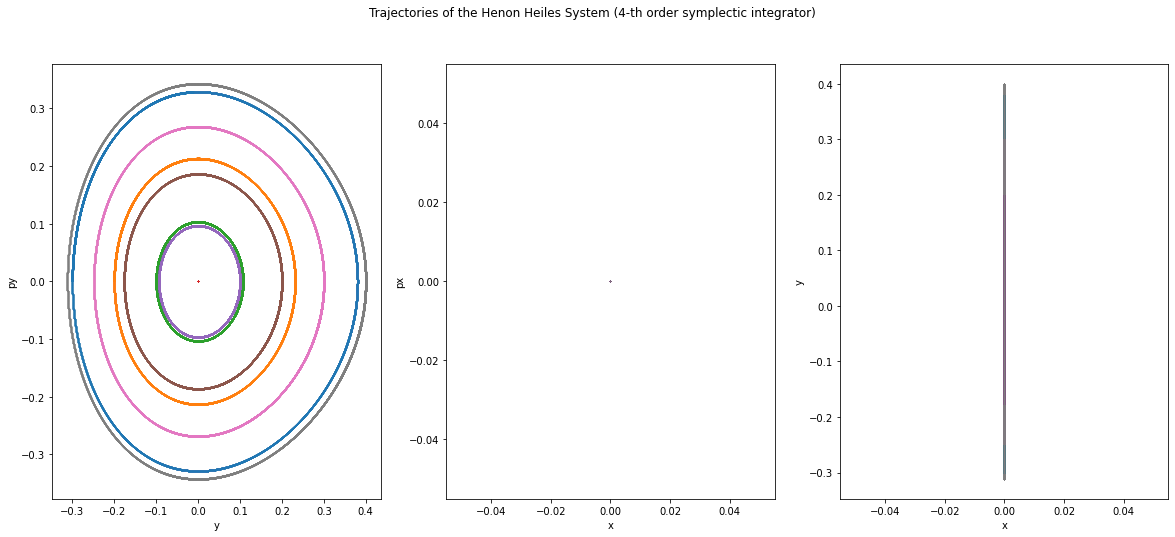

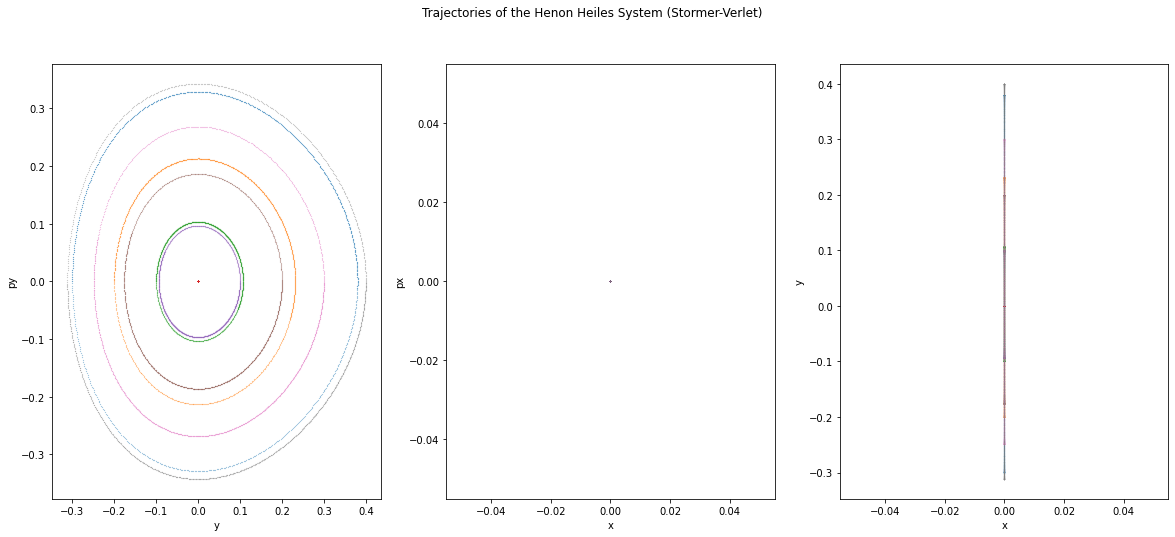

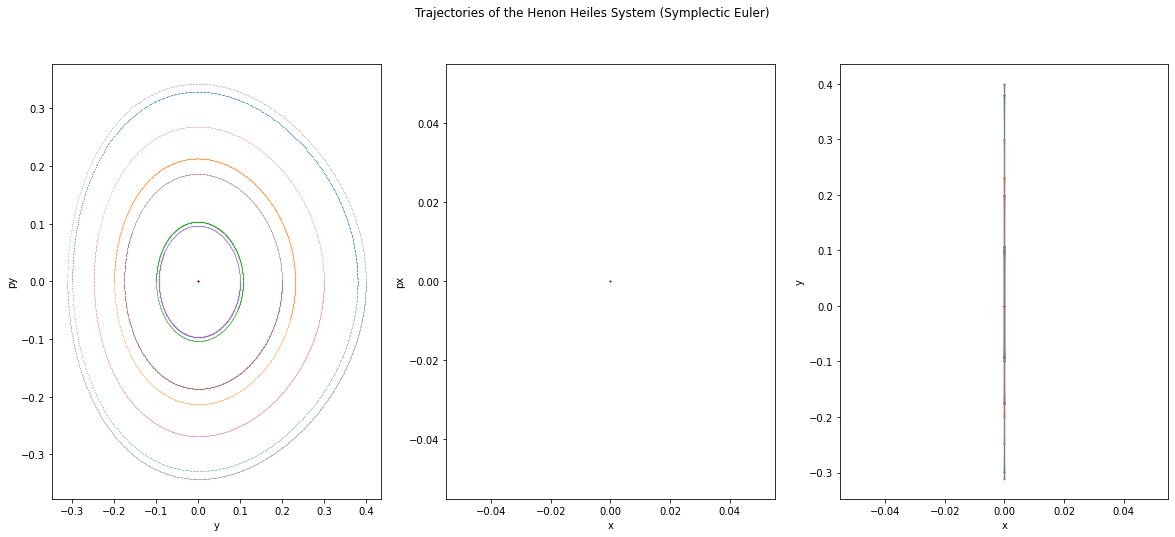

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def henonheiles(inp, lmbda=1.):
  # inp[0] = x, inp[1] = y, inp[2] = px, inp[3] = py
  return [inp[2], inp[3], -inp[0]-2*lmbda*inp[0]*inp[1], -inp[1]-lmbda*(inp[0]*inp[0]-inp[1]*inp[1])]

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x, lmbda: np.asarray([-x[0]-2*lmbda*x[0]*x[1], -x[1]-lmbda*(x[0]*x[0]-x[1]*x[1])])

fig, ax = plt.subplots(1,3,figsize = (20,8))
for i in np.linspace(-0.3,0.4,8): # number of trajectories
    inp, lmbda = np.array([0,i,0,0]), 1
    soln = FourthOrder(inp,f1,f2,0.0001,lmbda,N=80000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Henon Heiles System (4-th order symplectic integrator)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
for i in np.linspace(-0.3,0.4,8): # number of trajectories
    inp, lmbda = np.array([0,i,0,0]), 1
    soln = StormerTrajectory(inp,f1,f2,0.01,lmbda,N=1000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Henon Heiles System (Stormer-Verlet)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
for i in np.linspace(-0.3,0.4,8): # number of trajectories
    inp, lmbda = np.array([0,i,0,0]), 1
    soln = classicTrajectory(inp,f1,f2,0.01,lmbda,N=1000,n_h=1)
    ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
    ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
    ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Henon Heiles System (Symplectic Euler)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

## Comparing to other full trajectories [1](https://github.com/williamgilpin/rk4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


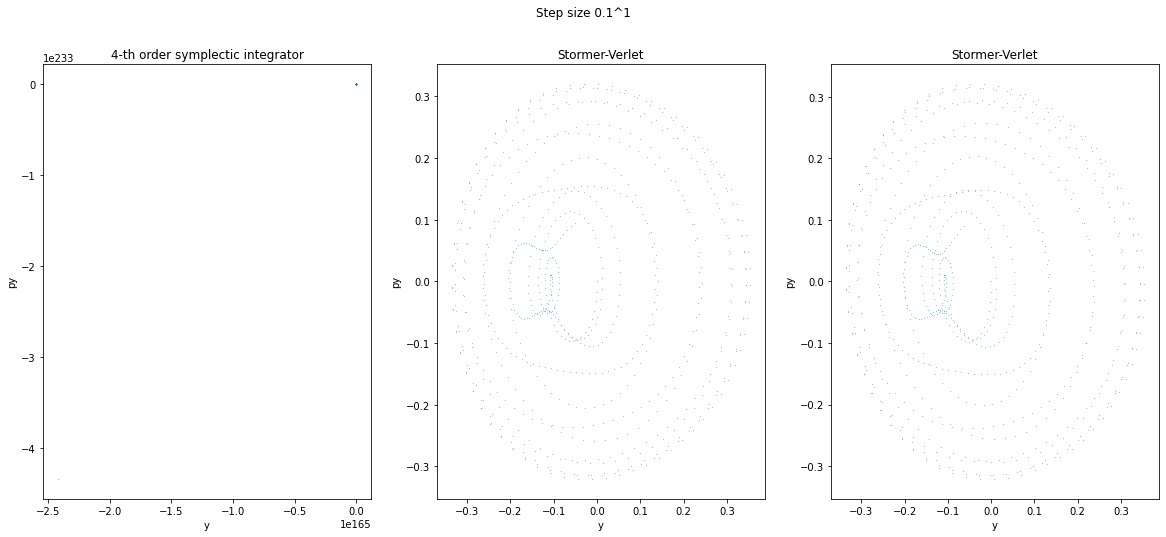

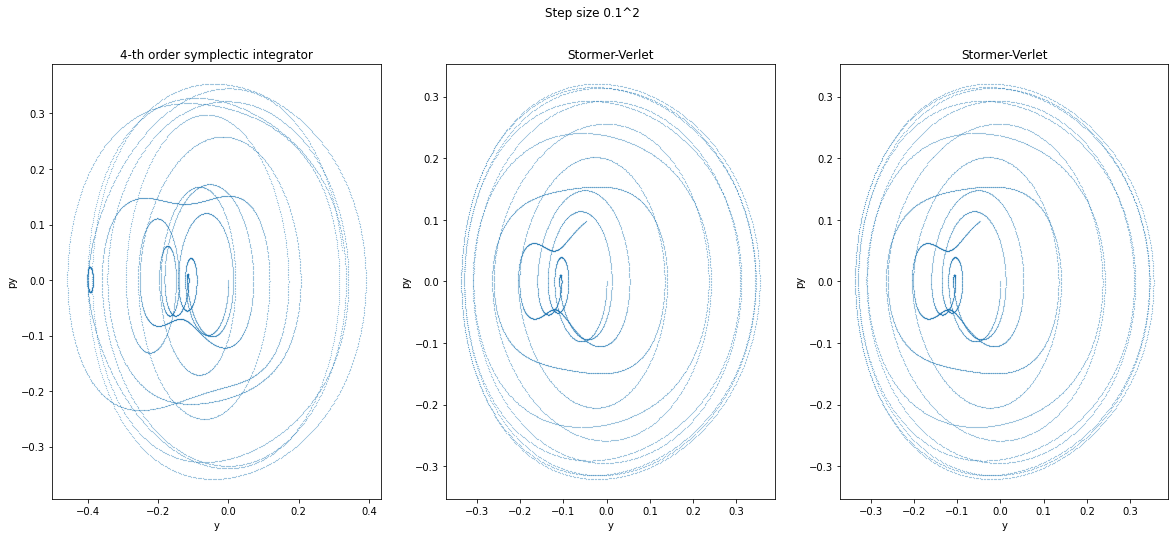

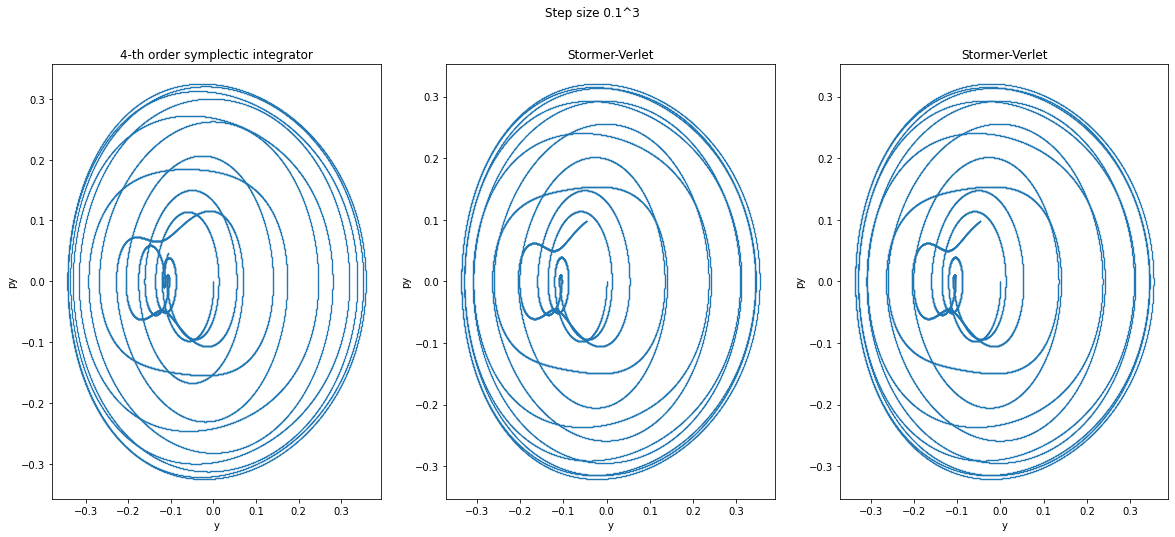

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def henonheiles(inp, lmbda=1.):
  # inp[0] = x, inp[1] = y, inp[2] = px, inp[3] = py
  return [inp[2], inp[3], -inp[0]-2*lmbda*inp[0]*inp[1], -inp[1]-lmbda*(inp[0]*inp[0]-inp[1]*inp[1])]

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x, lmbda: np.asarray([-x[0]-2*lmbda*x[0]*x[1], -x[1]-lmbda*(x[0]*x[0]-x[1]*x[1])])

for i in range(3):
  fig, ax = plt.subplots(1,3,figsize = (20,8))
  inp, lmbda = np.array([0.408248, 0.0, 0.0, 0.0]), 1
  soln = FourthOrder(inp,f1,f2,0.1**(i+1),lmbda,N=80*10**(i+1),n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:],H marker = '.', s=0.1)
  ax[0].title.set_text("4-th order symplectic integrator")
  soln = StormerTrajectory(inp,f1,f2,0.1**(i+1),lmbda,N=80*10**(i+1),n_h=1)
  ax[1].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].title.set_text("Stormer-Verlet")
  soln = classicTrajectory(inp,f1,f2,0.1**(i+1),lmbda,N=80*10**(i+1),n_h=1)
  ax[2].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[2].title.set_text("Stormer-Verlet")
  ax[0].set_xlabel("y")
  ax[0].set_ylabel("py")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("y")
  ax[2].set_ylabel("py")
  fig.suptitle("Step size 0.1^%s" %(i+1))
  plt.show()

## Poincare Plots

Recreating the Poincare plot, where the value of the Hamiltonian is $E=\frac{1}{12}$ [1](https://phas.ubc.ca/~berciu/TEACHING/PHYS349/ryanm.pdf) and the initial conditions are from [2](https://mathematica.stackexchange.com/questions/204648/evaluating-the-poincar%C3%A9-section-for-h%C3%A9non-heiles-potential-through-h%C3%A9non-method)

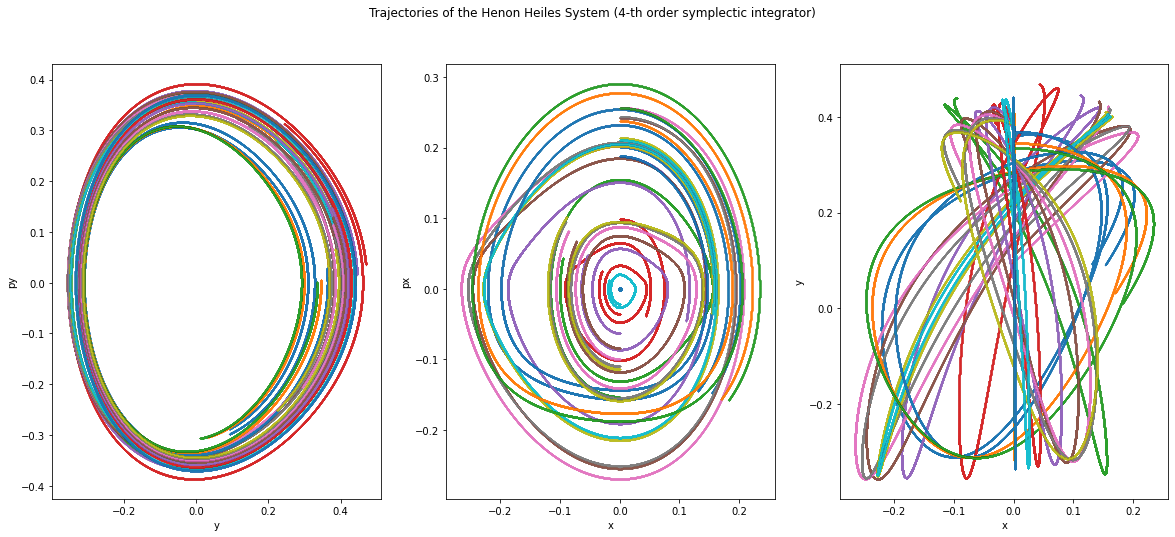

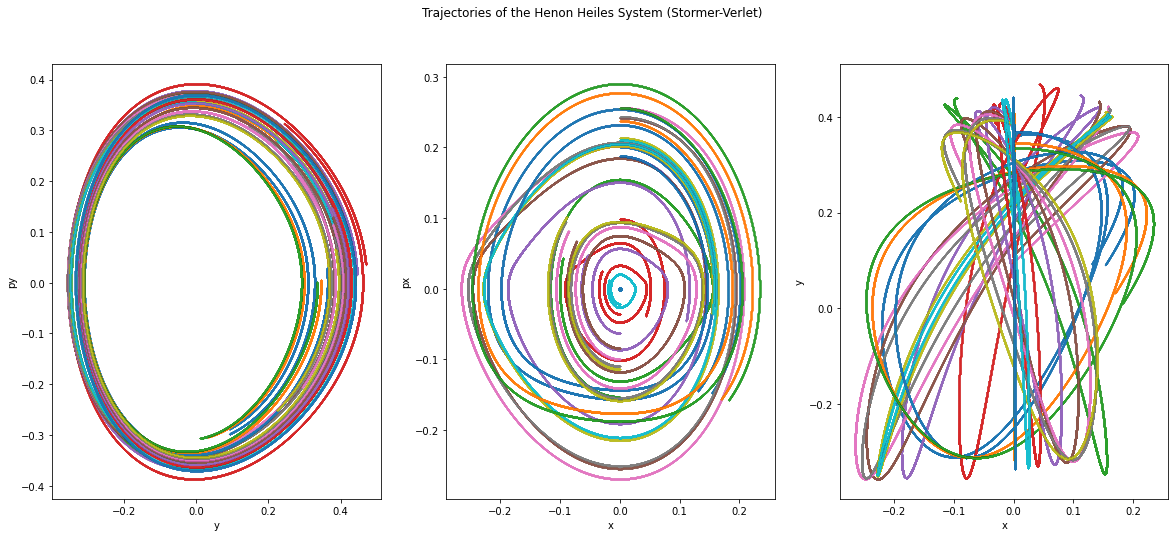

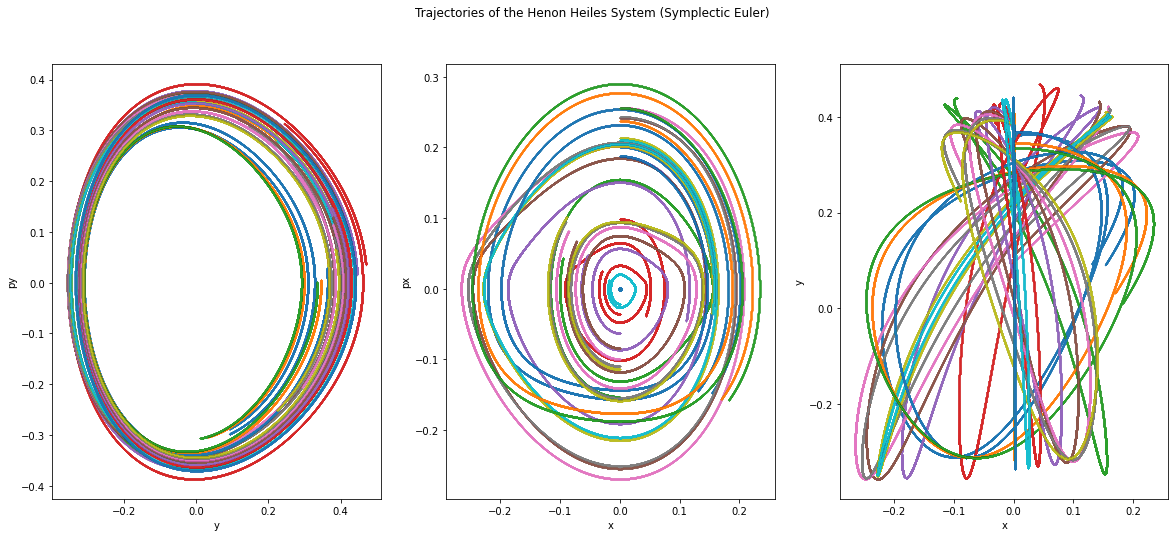

In [ ]:
f_xdot = lambda E, y, ydot: (2*E-ydot**2 -y**2 +(2*y**3)/3)**0.5

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x, lmbda: np.asarray([-x[0]-2*lmbda*x[0]*x[1], -x[1]-lmbda*(x[0]*x[0]-x[1]*x[1])])

store = [[0, 0.36169437164930385, 0.20100851639176504, 0.029106357137938632], 
         [0, 0.4082401254164024, 0, 0], 
         [0, 0.24008038662195985, -0.15316368171208566, 0.28838672839135326],
         [0, 0.24352018790129148, 0.09848498536170303, 0.3135210500944904],
         [0, 0.20788819727584018, 0.18687849877360435, 0.3047456328865395],
         [0, 0.11124773284074371, 0.24234454959281115, 0.32410152798705066], 
         [0, 0.09612790055948518, 0.2562151235263743, 0.32091473672760257], 
         [0, 0.14504873906640348, 0.2433184249171519, 0.3098719090788399], 
         [0, 0.21466692008332666, 0.21341797098009158, 0.2855018063099425], 
         [0, 0.2242200636897092, 0.21057030870037158, 0.27976766448196655], 
         [0, 0.3683386516212832, 0.18778901046261137, 0.011696534024095057], 
         [0, 0.3451153373835715, 0.23762310035771178, 0.005962392196119196], 
         [0, 0.33504538978074816, 0.256132905175892, 0.0016617858251372995], 
         [0, 0.37097564355830726, -0.03575247849541091, 0.1665183633794433], 
         [0, 0.37507484064199426, -0.06280527015275122, 0.14788240243852177], 
         [0, 0.3774580162329546, -0.08416273725065143, 0.12924644149760023], 
         [0, 0.3779249463635693, -0.09982487978911159, 0.11491108692766056], 
         [0, 0.3818158505457779, -0.10979169776813169, 0.08910744870176919], 
         [0, 0.3850735819245613, -0.11406319118771174, 0.06617088138986574], 
         [0, 0.3571135001050445, -0.02151416709681081, 0.1966226079763166], 
         [0, 0.3537329768656702, -0.0015805311387706023, 0.20379028526128642]]
fig, ax = plt.subplots(1,3,figsize = (20,8))
for inp in store: # number of trajectories
  lmbda = 1
  soln = FourthOrder(np.array(inp),f1,f2,0.0001,lmbda,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Henon Heiles System (4-th order symplectic integrator)")
  ax[0].set_xlabel("y")
  ax[0].set_ylabel("py")
  ax[1].set_xlabel("x")
  ax[1].set_ylabel("px")
  ax[2].set_xlabel("x")
  ax[2].set_ylabel("y")
plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
for inp in store: # number of trajectories
  lmbda = 1
  soln = StormerTrajectory(np.array(inp),f1,f2,0.0001,lmbda,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Henon Heiles System (Stormer-Verlet)")
  ax[0].set_xlabel("y")
  ax[0].set_ylabel("py")
  ax[1].set_xlabel("x")
  ax[1].set_ylabel("px")
  ax[2].set_xlabel("x")
  ax[2].set_ylabel("y")
plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
for inp in store: # number of trajectories
  lmbda = 1
  soln = classicTrajectory(np.array(inp),f1,f2,0.0001,lmbda,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Henon Heiles System (Symplectic Euler)")
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

0.07138934982664409
Trajectories of the Henon Heiles System (4-th order symplectic integrator)


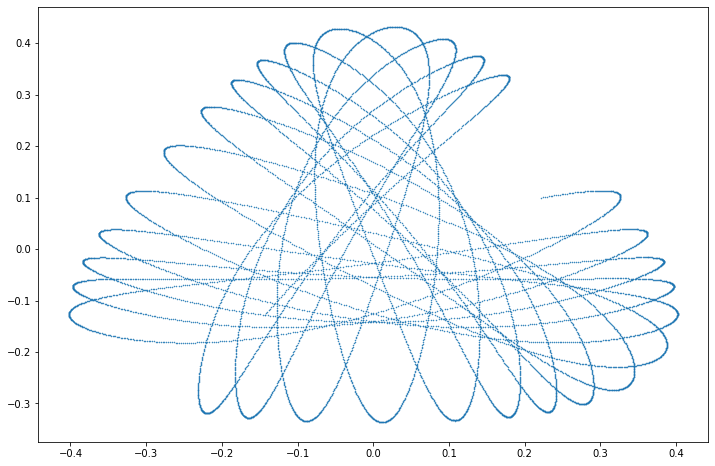

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x, lmbda: np.asarray([-x[0]-2*lmbda*x[0]*x[1], -x[1]-lmbda*(x[0]*x[0]-x[1]*x[1])])
H = lambda z: 0.5*(z[2]**2 + z[3]**2) + 0.5*(z[0]**2 + z[1]**2) + 1.0*(z[1]*z[0]**2 - 1/3*z[1]**3)

np.random.seed(0)
fig, ax = plt.subplots(1,1,figsize = (12,8))
inp, lmbda = np.random.rand(4), 1
while H(inp)>1/12:
  inp = np.random.rand(4)
print(H(inp))
soln = StormerTrajectory(inp,f1,f2,0.01,lmbda,N=10000,n_h=1)
ax.scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=1)
print("Trajectories of the Henon Heiles System (4-th order symplectic integrator)")
# ax[0].set_xlabel("x")
# ax[0].set_ylabel("y")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
plt.show()


### Poincare plot requires finding of crossings using initial conditions from [1](https://github.com/williamgilpin/rk4/blob/409296dd3127ec4702d9c053aecfede6d5021832/rk4_poincare.py#L39)

100%|██████████| 4/4 [00:24<00:00,  6.19s/it]


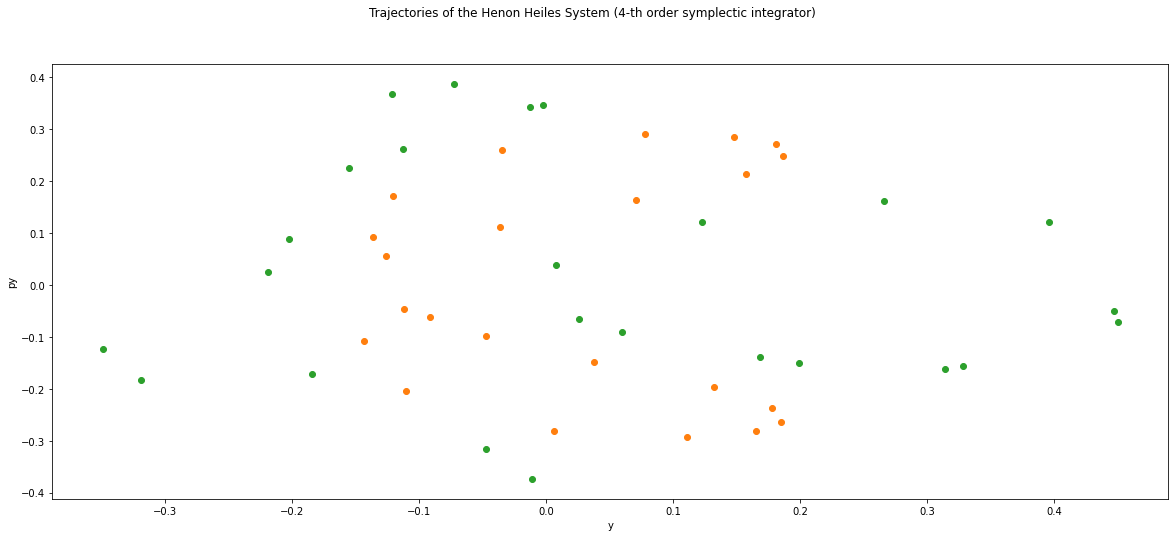

In [ ]:
from tqdm import tqdm
store = [np.array([0.0, 0.5, 0.0, 0.0]), np.array([0.408248, 0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.408248, 0.0]), np.array([0.0, 0.0, 0.0, 0.408248])]

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (20,8))
for inp in tqdm(store): # number of trajectories
  lmbda = 1
  soln = FourthOrder(inp,f1,f2,0.001,lmbda,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:])
  yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints)
  fig.suptitle("Trajectories of the Henon Heiles System (4-th order symplectic integrator)")
  ax.set_xlabel("y")
  ax.set_ylabel("py")
plt.show()

100%|██████████| 4/4 [00:54<00:00, 13.74s/it]


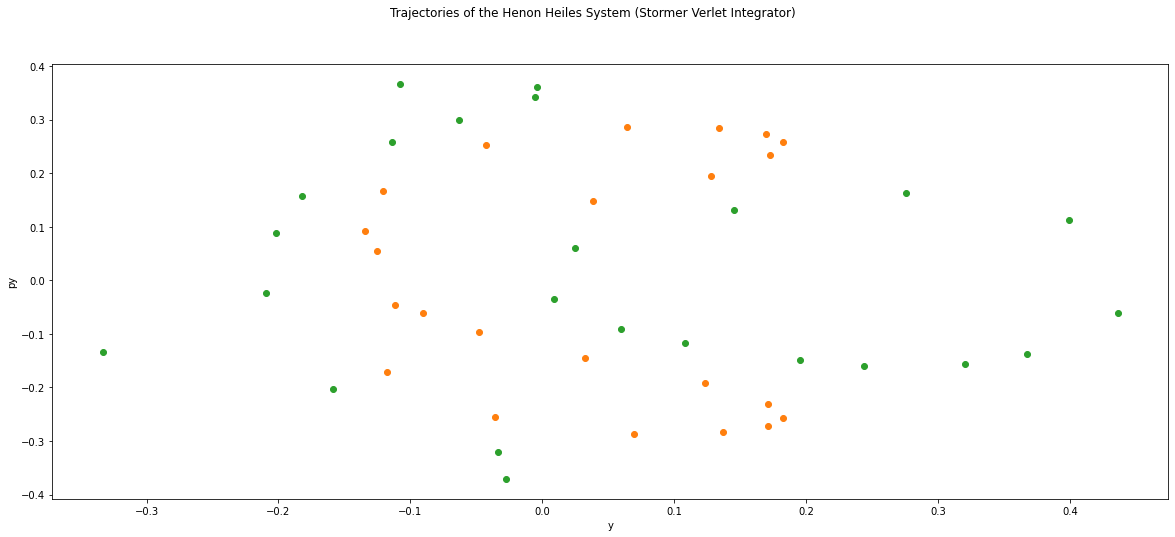

In [ ]:
from tqdm import tqdm
store = [np.array([0.0, 0.5, 0.0, 0.0]), np.array([0.408248, 0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.408248, 0.0]), np.array([0.0, 0.0, 0.0, 0.408248])]

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (20,8))
for inp in tqdm(store): # number of trajectories
  lmbda = 1
  soln = StormerTrajectory(inp,f1,f2,0.001,lmbda,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:])
  yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints)
  fig.suptitle("Trajectories of the Henon Heiles System (Stormer Verlet Integrator)")
  ax.set_xlabel("y")
  ax.set_ylabel("py")
plt.show()

Using initial conditions from [2](https://mathematica.stackexchange.com/questions/204648/evaluating-the-poincar%C3%A9-section-for-h%C3%A9non-heiles-potential-through-h%C3%A9non-method) for different energy levels

100%|██████████| 1/1 [02:56<00:00, 176.54s/it]


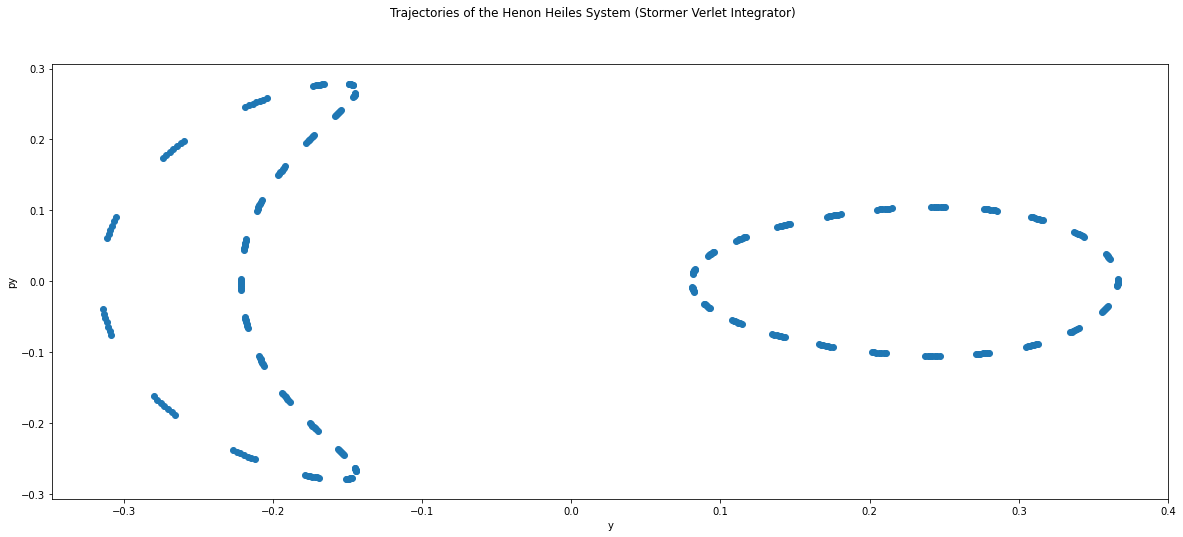

In [ ]:
from tqdm import tqdm
store = [np.array([0, 0.36169437164930385, 0.20100851639176504, 0.029106357137938632])]

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (20,8))
for inp in tqdm(store): # number of trajectories
  lmbda = 1
  soln = StormerTrajectory(inp,f1,f2,0.001,lmbda,N=1000000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:])
  yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints)
  fig.suptitle("Trajectories of the Henon Heiles System (Stormer Verlet Integrator)")
  ax.set_xlabel("y")
  ax.set_ylabel("py")
plt.show()

100%|██████████| 29/29 [08:25<00:00, 17.44s/it]


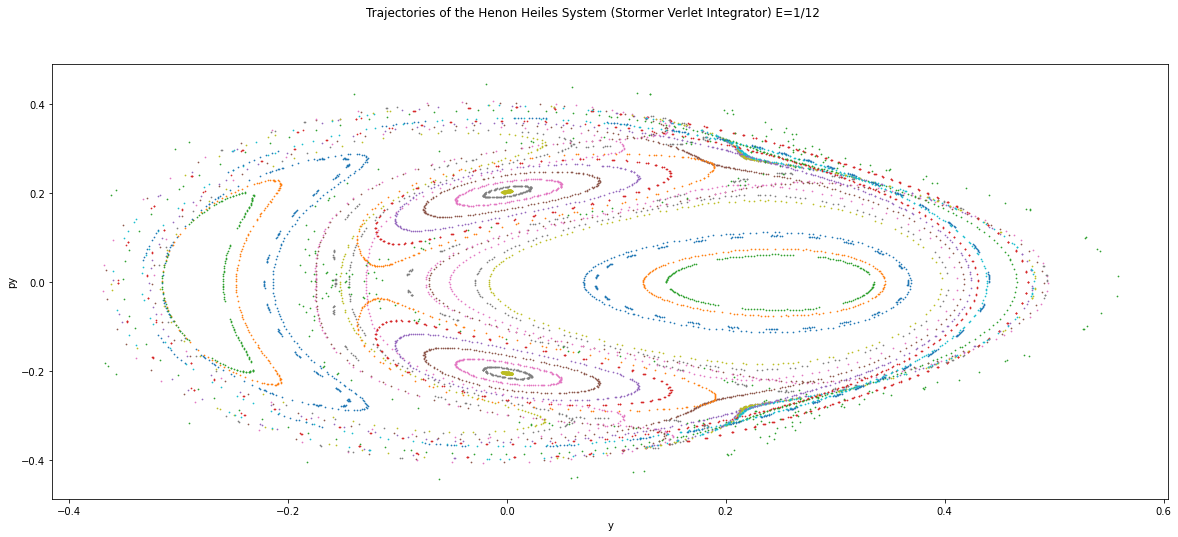

In [ ]:
store = np.asarray([[0, 0.36169437164930385, 0.20100851639176504, 0.029106357137938632], 
         [0, 0.4082401254164024, 0, 0], 
         [0, 0.24008038662195985, -0.15316368171208566, 0.28838672839135326],
         [0, 0.24352018790129148, 0.09848498536170303, 0.3135210500944904],
         [0, 0.20788819727584018, 0.18687849877360435, 0.3047456328865395],
         [0, 0.11124773284074371, 0.24234454959281115, 0.32410152798705066], 
         [0, 0.09612790055948518, 0.2562151235263743, 0.32091473672760257], 
         [0, 0.14504873906640348, 0.2433184249171519, 0.3098719090788399], 
         [0, 0.21466692008332666, 0.21341797098009158, 0.2855018063099425], 
         [0, 0.2242200636897092, 0.21057030870037158, 0.27976766448196655], 
         [0, 0.3683386516212832, 0.18778901046261137, 0.011696534024095057], 
         [0, 0.3451153373835715, 0.23762310035771178, 0.005962392196119196], 
         [0, 0.33504538978074816, 0.256132905175892, 0.0016617858251372995], 
         [0, 0.37097564355830726, -0.03575247849541091, 0.1665183633794433], 
         [0, 0.37507484064199426, -0.06280527015275122, 0.14788240243852177], 
         [0, 0.3774580162329546, -0.08416273725065143, 0.12924644149760023], 
         [0, 0.3779249463635693, -0.09982487978911159, 0.11491108692766056], 
         [0, 0.3818158505457779, -0.10979169776813169, 0.08910744870176919], 
         [0, 0.3850735819245613, -0.11406319118771174, 0.06617088138986574], 
         [0, 0.3571135001050445, -0.02151416709681081, 0.1966226079763166], 
         [0, 0.3537329768656702, -0.0015805311387706023, 0.20379028526128642],
         [0, 0.144004, 0.326286, 0.203595],
         [0, 0.320282, 0.231622, 0.273846],
         [0, 0.148481, 0.289617, 0.250835],
         [0, 0.118434, 0.307157, 0.243712],
         [0, 0.0795505, 0.322253, 0.238371],
         [0, 0.0495039, 0.340061, 0.220565],
         [0, 0.0194574, 0.34636, 0.215224],
         [0, 0.00355045, 0.352249, 0.206321]])

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (20,8))
for inp in tqdm(store): # number of trajectories
  lmbda = 1
  soln = StormerTrajectory(inp,f1,f2,0.01,lmbda,N=100000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:])
  yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints, marker = '.', s=2.)
  fig.suptitle("Trajectories of the Henon Heiles System (Stormer Verlet Integrator) E=1/12")
  ax.set_xlabel("y")
  ax.set_ylabel("py")
plt.show()

100%|██████████| 20/20 [05:46<00:00, 17.34s/it]


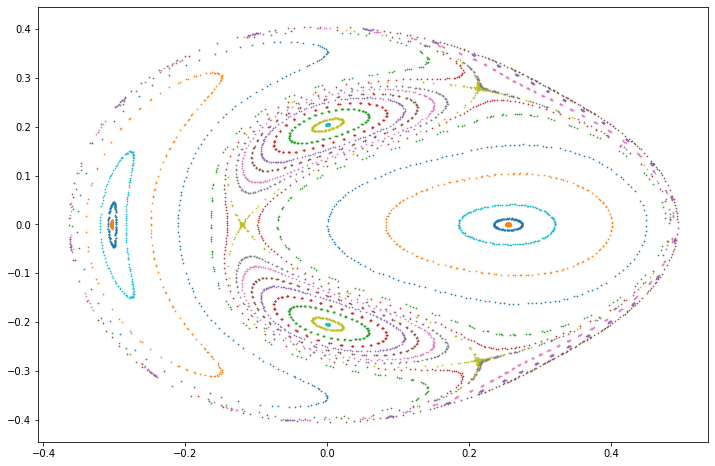

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x, lmbda: np.asarray([-x[0]-2*lmbda*x[0]*x[1], -x[1]-lmbda*(x[0]*x[0]-x[1]*x[1])])

store = np.asarray([[0, 0.4082401254164024, 0, 0], 
[0, 0.24008038662195985, -0.15316368171208566, 0.28838672839135326], 
[0, 0.24352018790129148, 0.09848498536170303, 0.3135210500944904], 
[0, 0.20788819727584018, 0.18687849877360435, 0.3047456328865395], 
[0, 0.11124773284074371, 0.24234454959281115, 0.32410152798705066], 
[0, 0.09612790055948518, 0.2562151235263743, 0.32091473672760257], 
[0, 0.14504873906640348, 0.2433184249171519, 0.3098719090788399], 
[0, 0.21466692008332666, 0.21341797098009158, 0.2855018063099425], 
[0, 0.2242200636897092, 0.21057030870037158, 0.27976766448196655], 
[0, 0.3683386516212832, 0.18778901046261137, 0.011696534024095057], 
[0, 0.3451153373835715, 0.23762310035771178, 0.005962392196119196], 
[0, 0.33504538978074816, 0.256132905175892, 0.0016617858251372995], 
[0, 0.37097564355830726, -0.03575247849541091, 0.1665183633794433], 
[0, 0.37507484064199426, -0.06280527015275122, 0.14788240243852177], 
[0, 0.3774580162329546, -0.08416273725065143, 0.12924644149760023], 
[0, 0.3779249463635693, -0.09982487978911159, 0.11491108692766056], 
[0, 0.3818158505457779, -0.10979169776813169, 0.08910744870176919], 
[0, 0.3850735819245613, -0.11406319118771174, 0.06617088138986574], 
[0, 0.3571135001050445, -0.02151416709681081, 0.1966226079763166], 
[0, 0.3537329768656702, -0.0015805311387706023, 0.20379028526128642]])
store = store[:, [0,2,1,3]]

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (12,8))
for inp in tqdm(store): # number of trajectories
  lmbda = 1
  soln = StormerTrajectory(inp,f1,f2,0.01,lmbda,N=100000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:])
  yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints, marker = '.', s=2.)
  # fig.suptitle("Trajectories of the Henon Heiles System (4-th order symplectic integrator) E=0.12333")
  # ax.set_xlabel("y")
  # ax.set_ylabel("py")
plt.show()

In [6]:
store = np.asarray([[0, 0.4082401254164024, 0, 0], 
[0, 0.24008038662195985, -0.15316368171208566, 0.28838672839135326], 
[0, 0.24352018790129148, 0.09848498536170303, 0.3135210500944904], 
[0, 0.20788819727584018, 0.18687849877360435, 0.3047456328865395], 
[0, 0.11124773284074371, 0.24234454959281115, 0.32410152798705066], 
[0, 0.09612790055948518, 0.2562151235263743, 0.32091473672760257], 
[0, 0.14504873906640348, 0.2433184249171519, 0.3098719090788399], 
[0, 0.21466692008332666, 0.21341797098009158, 0.2855018063099425], 
[0, 0.2242200636897092, 0.21057030870037158, 0.27976766448196655], 
[0, 0.3683386516212832, 0.18778901046261137, 0.011696534024095057], 
[0, 0.3451153373835715, 0.23762310035771178, 0.005962392196119196], 
[0, 0.33504538978074816, 0.256132905175892, 0.0016617858251372995], 
[0, 0.37097564355830726, -0.03575247849541091, 0.1665183633794433], 
[0, 0.37507484064199426, -0.06280527015275122, 0.14788240243852177], 
[0, 0.3774580162329546, -0.08416273725065143, 0.12924644149760023], 
[0, 0.3779249463635693, -0.09982487978911159, 0.11491108692766056], 
[0, 0.3818158505457779, -0.10979169776813169, 0.08910744870176919], 
[0, 0.3850735819245613, -0.11406319118771174, 0.06617088138986574], 
[0, 0.3571135001050445, -0.02151416709681081, 0.1966226079763166], 
[0, 0.3537329768656702, -0.0015805311387706023, 0.20379028526128642]])
store = store[:, [0,2,1,3]]

for i in store:
  print(H(i))

0.08332999999999999
0.08333
0.08333
0.08333
0.08333
0.08333000000000002
0.08333
0.08333
0.08333
0.08332999999999999
0.08333
0.08332999999999999
0.08333000000000003
0.08333000000000003
0.08332999999999997
0.08332999999999997
0.08333
0.08333
0.08333
0.08333


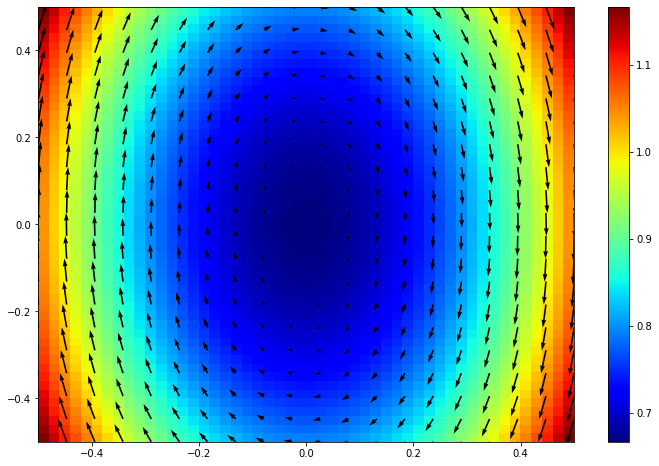

In [ ]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]-2*x[0]*x[1], -x[1]-(x[0]*x[0]-x[1]*x[1])])
H = lambda z: 0.5*(z[2]**2 + z[3]**2) + 0.5*(z[0]**2 + z[1]**2) + 1.0*(z[1]*z[0]**2 - 1/3*z[1]**3)

spacedim=[(-0.5,0.5), (-0.5,0.5),(-0.5,0.5), (-0.5,0.5)]
fvector = lambda x: np.asarray([f1(x), f2(x)])
h= 0.1

"""# Test dataset creation"""


xxshort1,yyshort1 = np.linspace(spacedim[0][0], spacedim[0][1], 50), np.linspace(spacedim[1][0], spacedim[1][1], 50)
xshort1,yshort1 = np.meshgrid(xxshort1,yyshort1)
xxshort2,yyshort2 = np.linspace(spacedim[0][0], spacedim[0][1], 20), np.linspace(spacedim[1][0], spacedim[1][1], 20)
xshort2,yshort2 = np.meshgrid(xxshort2,yyshort2)

sample_points = np.hstack((np.c_[np.ravel(xshort2),np.ravel(yshort2)], np.ones((20**2,2))))[:, [0,2,1,3]].transpose() #np.expand_dims(np.c_[np.ravel(xshort2),np.ravel(yshort2)],2)

plt.figure(figsize = (12,8))
plt.quiver(xshort2,yshort2,f1(sample_points)[0,:].reshape(xshort2.shape),f2(sample_points)[0,:].reshape(xshort2.shape)) #x,y,dH/dy,-dH/dx
plt.imshow(np.flip(H(np.hstack((np.c_[np.ravel(xshort1),np.ravel(yshort1)], np.ones((50**2,2))))[:, [0,2,1,3]].transpose()).reshape(xshort1.shape),0), cmap = cm.jet, extent = (spacedim[0][0], spacedim[0][1], spacedim[1][0], spacedim[1][1]), aspect = 'auto')
plt.colorbar()


## [Escape dynamics of the Henon Heiles Hamiltonian](https://arxiv.org/pdf/1709.04360.pdf)

It is well known, that particular types of Hamiltonian systems have a finite energy of escape and for lower values of the energy the equipotential surfaces of the systems are closed and therefore escape is impossible. For energy levels beyond the escape energy however, these surfaces open creating exit channels through which the particles can escape to infinity. 

The Henon-Heiles potential has two degrees of freedom (2-dof) and a finite energy of escape ($h_{esc}$) which is equal to 1/6. For values of energy $h < h_{esc}$, the equipotential curves of the system are closed thus making motion inescapable.

However, for larger energy levels ($h > h_{esc}$), the equipotential curves open and three exit channels appear through which the test particles may escape to infinity. The equipotential curves of the Henon-Heiles potential for various values of the energy h are shown in Fig. 1a. In the same plot, the equipotential corresponding to the energy of escape $h_{esc}$ is plotted with red color. Furthermore, the potential has a stable equilibrium point at (x, y) = (0, 0) and three saddle points: (x, y) = {(0, 1), (−√3/2, 1/2), (√3/2, 1/2)}. The saddle points constitute the three corners of the equipotential curve V(x, y) = 1/6, that can be seen with blue dots in Fig. 1a. This triangular area that is bounded by the equipotential curve with energy h = 1/6 is called the “interior region”, while all the outside available area of motion is known as
the “exterior region”. The open Zero Velocity Curve (ZVC) at the configuration (x, y) plane when $h = 0.20 > h_{esc}$ is presented with green color in Fig. 1b and the three channels of escape are shown.

<img src='https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11012-017-0647-8/MediaObjects/11012_2017_647_Fig1_HTML.gif'>


With a high enough energy level, the system, even if it appears to be within the stable triangular region, can still escape. The escape channels get wider as the energy of the system increases. 
<img src = 'https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11012-017-0647-8/MediaObjects/11012_2017_647_Fig2_HTML.gif'>

The structure of the φ >˙ 0 part of the configuration (x, y) space for several values of the energy h, distinguishing between different escape channels. The color code is as follows: Non-escaping regular (gray); trapped chaotic (black); escape through channel 1 (green); escape through channel 2 (red); escape through channel 3 (blue). The black, dashed circle denotes the scattering region.


In [ ]:
n_sample = 10
store = np.array(np.array(np.meshgrid(np.linspace(-0.5,0.5, n_sample),np.linspace(-0.5,0.5,n_sample),
                                        np.linspace(-0.5,0.5,n_sample),np.linspace(-0.5,0.5,n_sample)))).reshape(4, n_sample**4).transpose()


(10000, 4)

0.15983333333333336


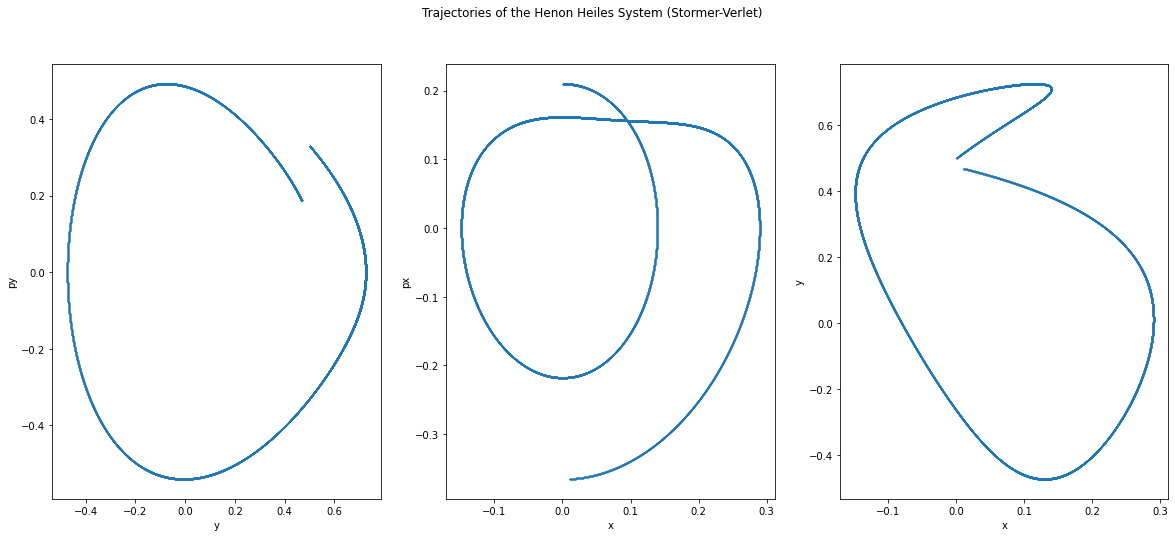

In [ ]:
f_xdot = lambda E, y, ydot: (2*E-ydot**2 -y**2 +(2*y**3)/3)**0.5

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x, lmbda: np.asarray([-x[0]-2*lmbda*x[0]*x[1], -x[1]-lmbda*(x[0]*x[0]-x[1]*x[1])])
H = lambda z: 0.5*(z[2]**2 + z[3]**2) + 0.5*(z[0]**2 + z[1]**2) + 1.0*(z[1]*z[0]**2 - 1/3*z[1]**3)

# n_sample = 4
# store = np.array(np.array(np.meshgrid(np.linspace(-0.5,0.5, n_sample),np.linspace(-0.5,0.5,n_sample),
#                                         np.linspace(-0.5,0.5,n_sample),np.linspace(-0.5,0.5,n_sample)))).reshape(4, n_sample**4).transpose()
store = np.array([[0, 0.5, 0.21, 0.33]])

print(H(store[0]))
fig, ax = plt.subplots(1,3,figsize = (20,8))
for inp in store: # number of trajectories
  lmbda = 1
  soln = StormerTrajectory(np.array(inp),f1,f2,0.0001,lmbda,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Henon Heiles System (Stormer-Verlet)")
  ax[0].set_xlabel("y")
  ax[0].set_ylabel("py")
  ax[1].set_xlabel("x")
  ax[1].set_ylabel("px")
  ax[2].set_xlabel("x")
  ax[2].set_ylabel("y")
plt.show()

